# Project.3 - Red Wine Quality Prediction

Dataset Observation:

In [18]:
# importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [19]:
#loading the data set 
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.shape

(1599, 12)

Observation: dataset contains the 13 columns and 1600 rows 

In [21]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observation: 12 variables contains float data type and  One column contain s intger data types 

####EDA process

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation: there is no null values in data types

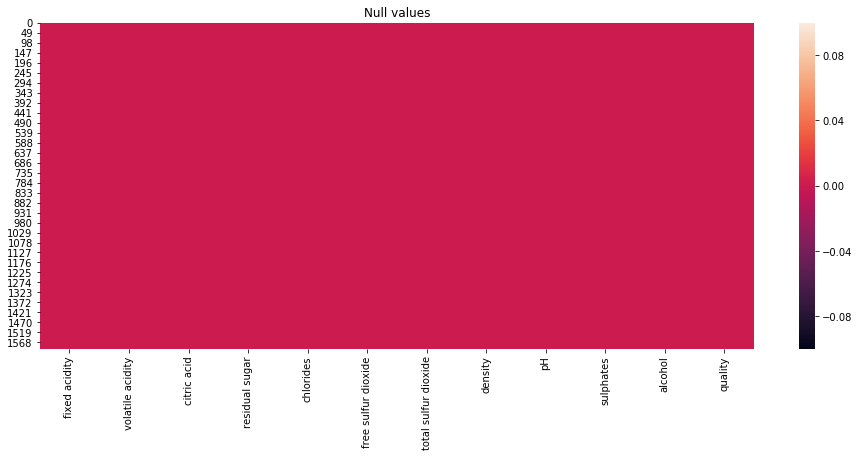

In [23]:
#Heat map to check the null values

plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: We clearly see that there is no values in heat map

In [24]:
#to check the classification in target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation: 
1. 681 rows have the wine quality is 5, its the highest population in the target variable 
2. highest wine quality is the 8 and population is 18
3. target vaiable have 6 classfication 

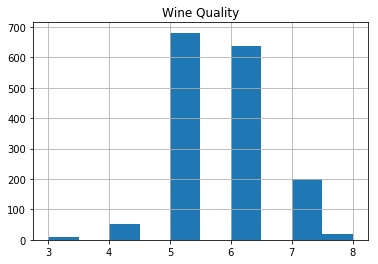

In [25]:
df['quality'].hist(grid=True)
plt.title('Wine Quality')
plt.show()

Observation: highest population of classification is 5  and lowest population of wine qaulity is 3 

Task: we have to convert 5 classification to 2 , we have set an arbitrary cutoff for your dependent 
variable (wine quality) at e.g. 7 or
higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [26]:
df['best quality']=[1 if x>=7 else 0 for x in df.quality]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Observation: We have added  "Best quality" column to dataset based which wine quality has more then 7 points  that is GOOD (1)
and which wine scores below 7 points that is not good (0)

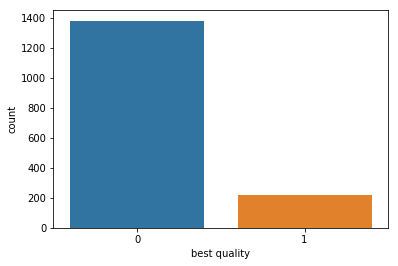

In [27]:
#univariate analysis
sns.countplot(df['best quality'])
plt.show()

Observation: We clearly see that population of good quality wine is less compare to the not good wine

In [28]:
#to check the classification in target variable
df['best quality'].value_counts()

0    1382
1     217
Name: best quality, dtype: int64

Observation: good wine quality is underpopulated so need to treat the data "over sampling or undersampling"

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# Observation:Mean of the quality of the wine is 5.63

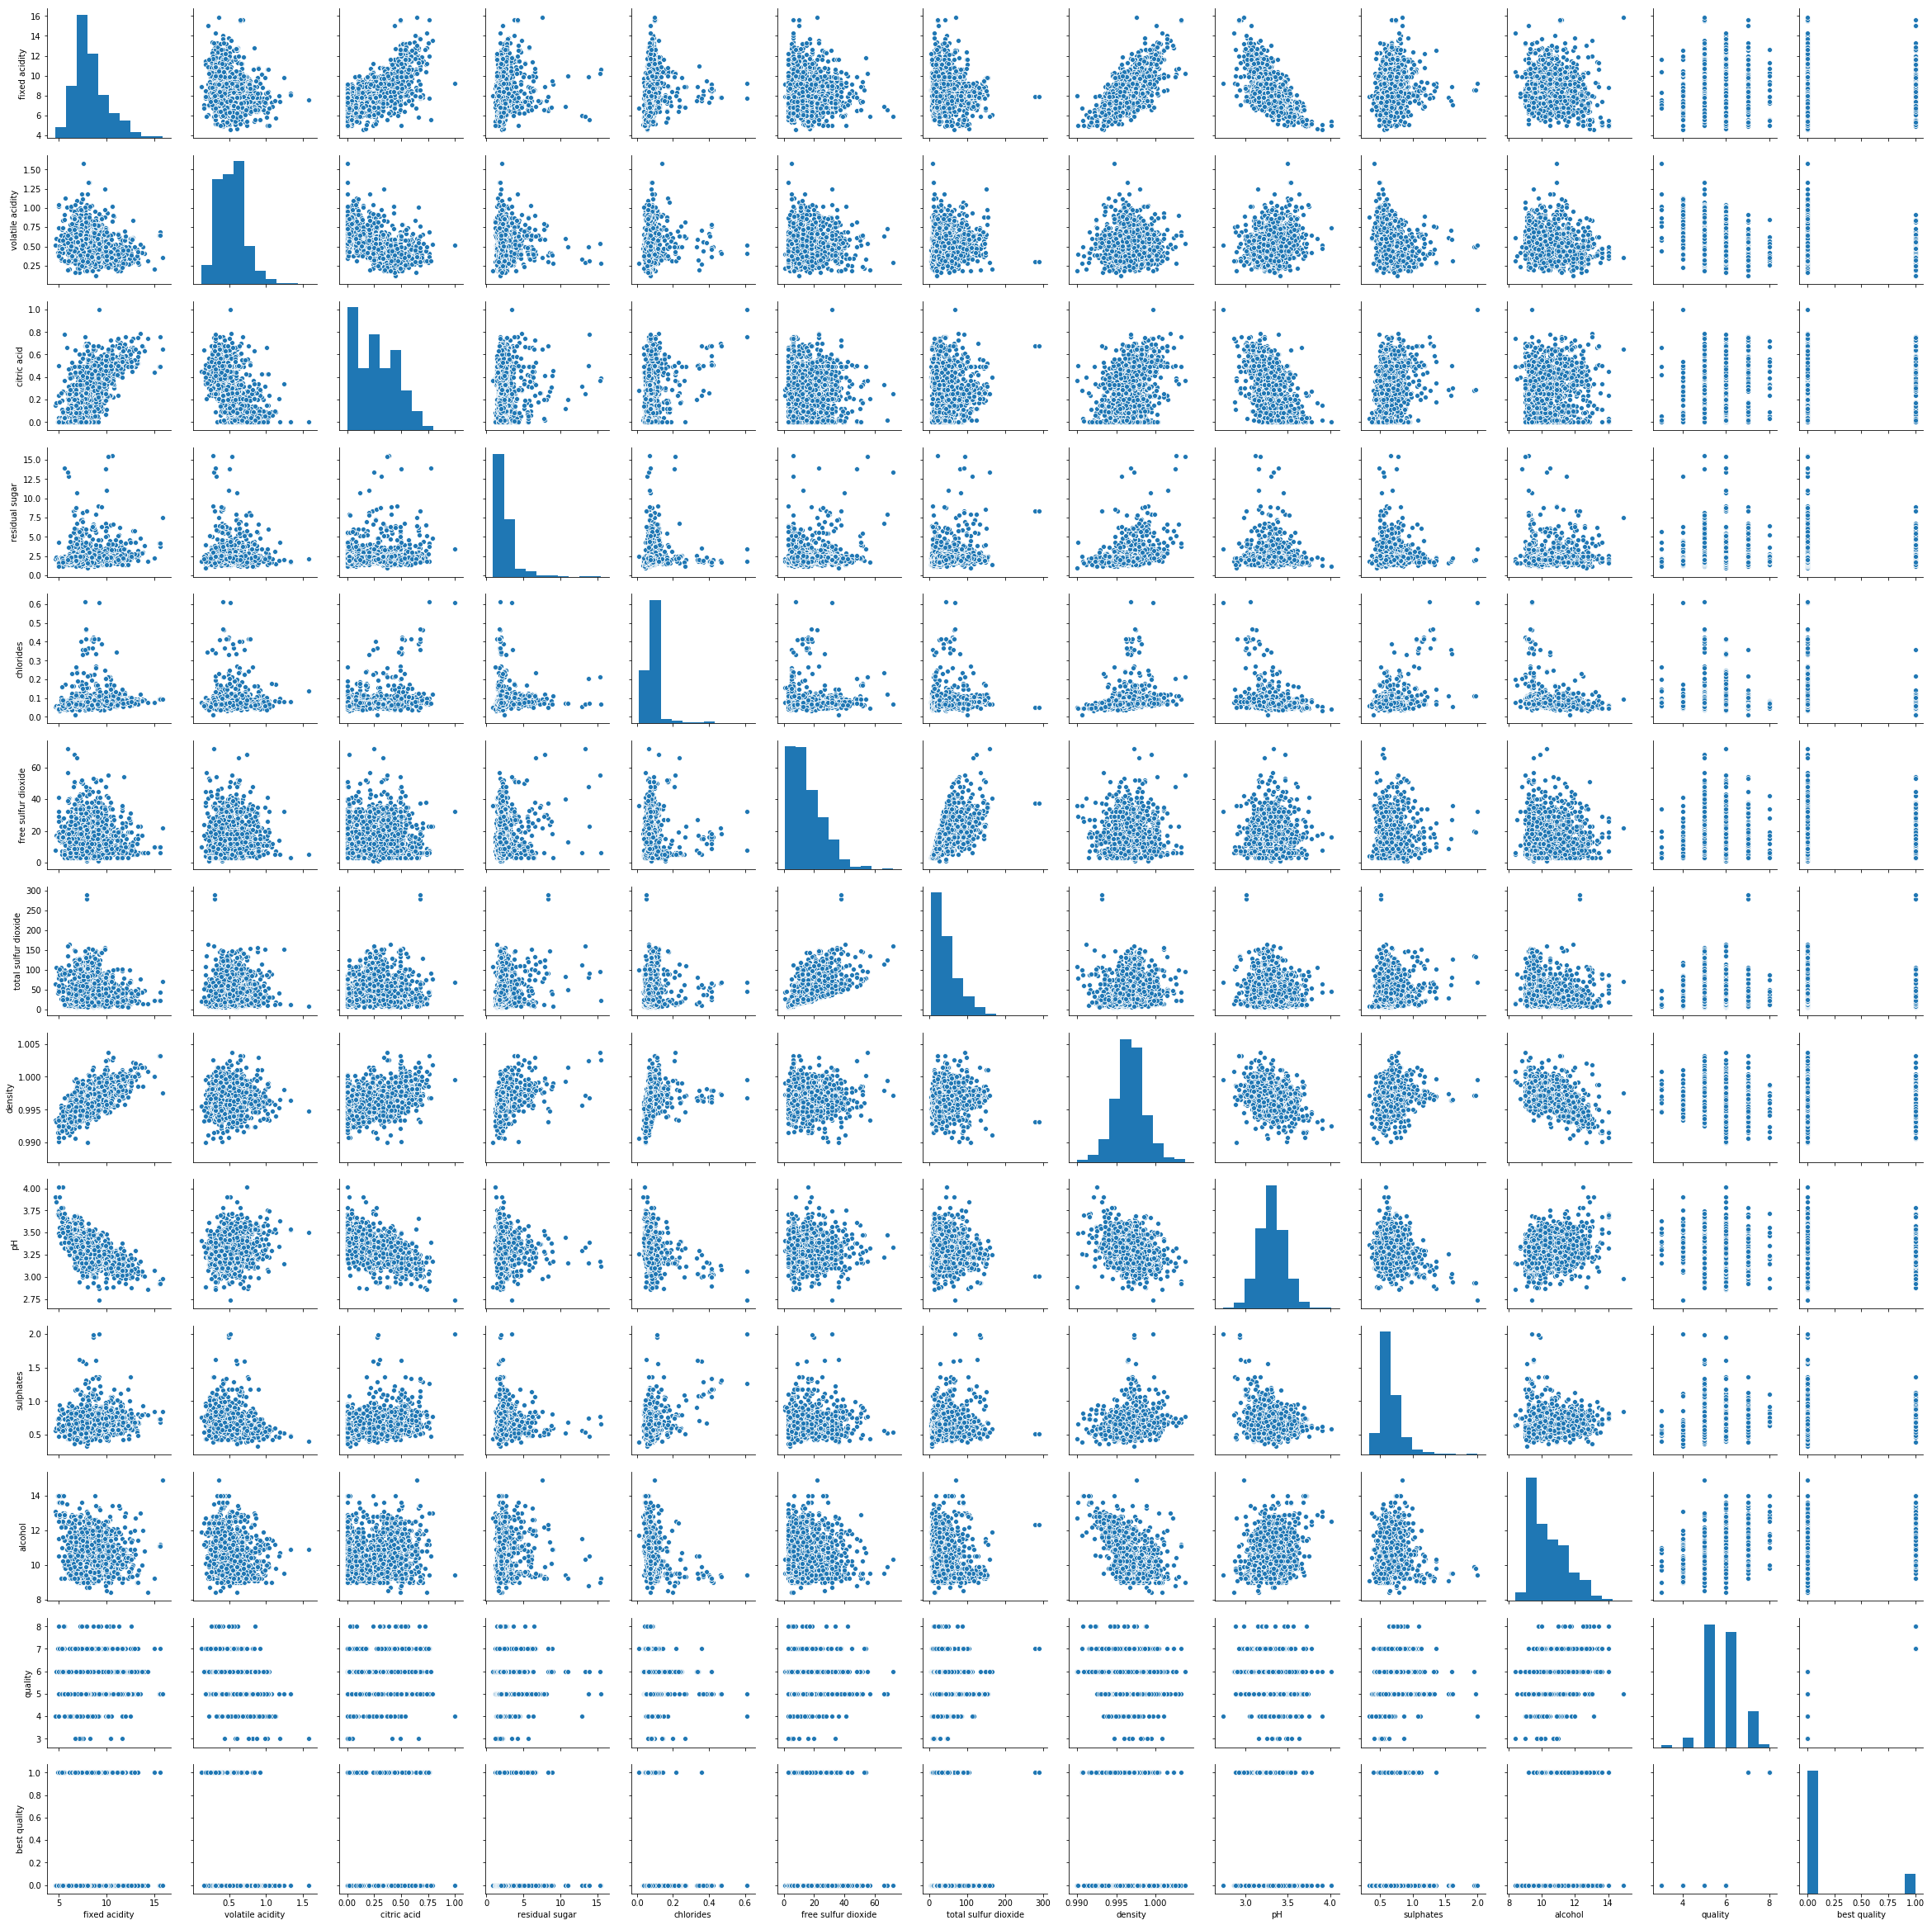

In [30]:
# plot pairplot
sns.pairplot(df)
#show graph
plt.show()

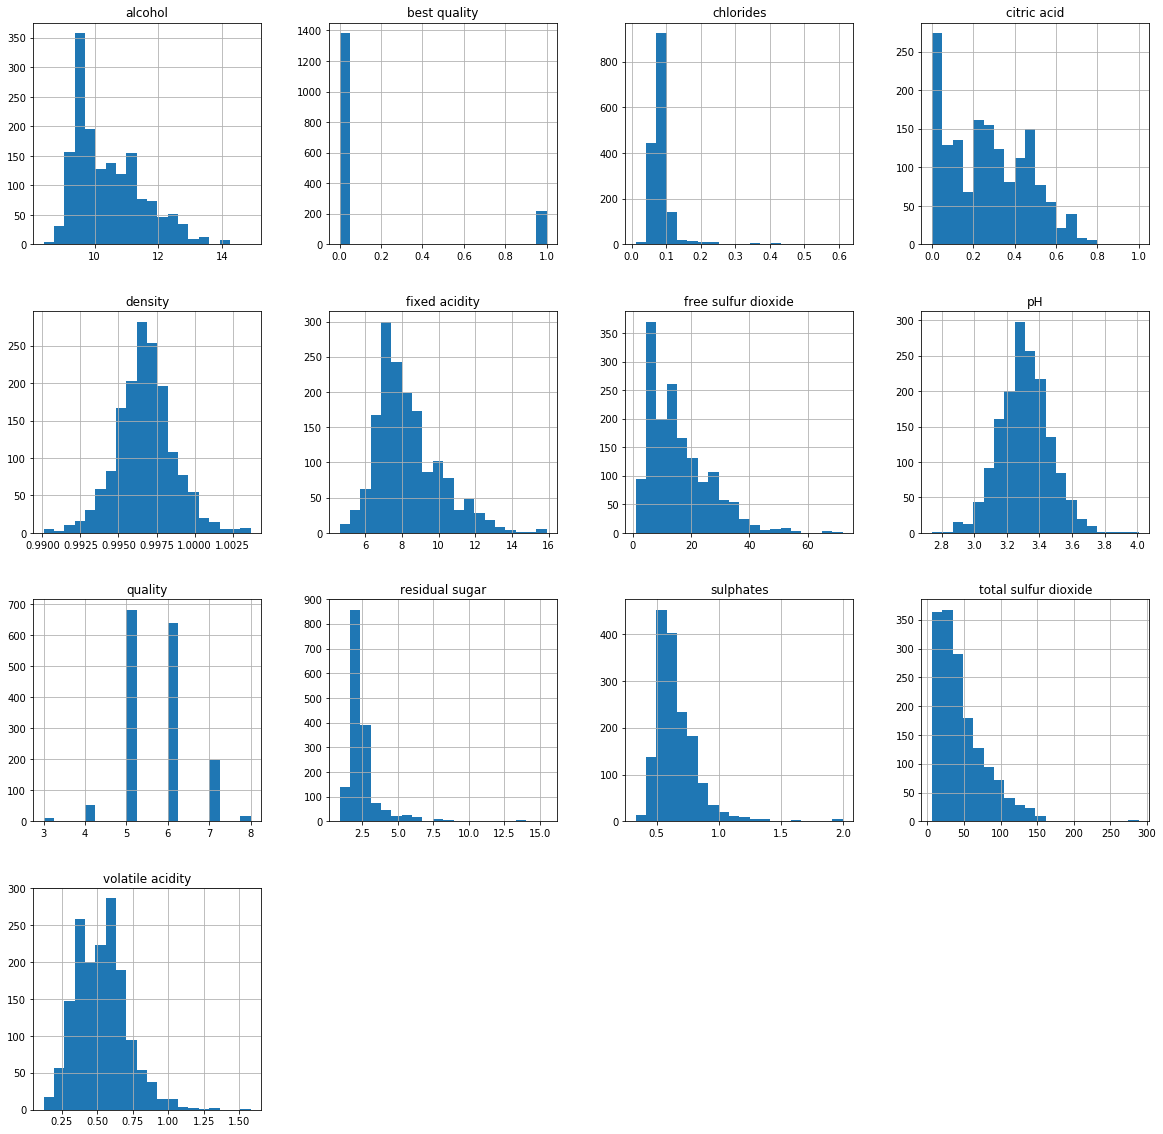

In [14]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

Observation: variable "density", "PH" values distributed normaly remaining variables normaly not distributed

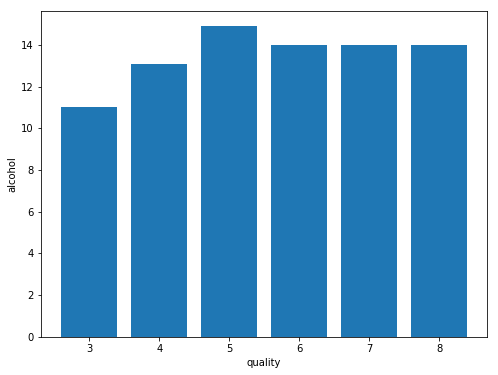

In [15]:
plt.figure(figsize=[8,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


We check how the quality of wine increases with increase the percent of alcohol in the wine. 

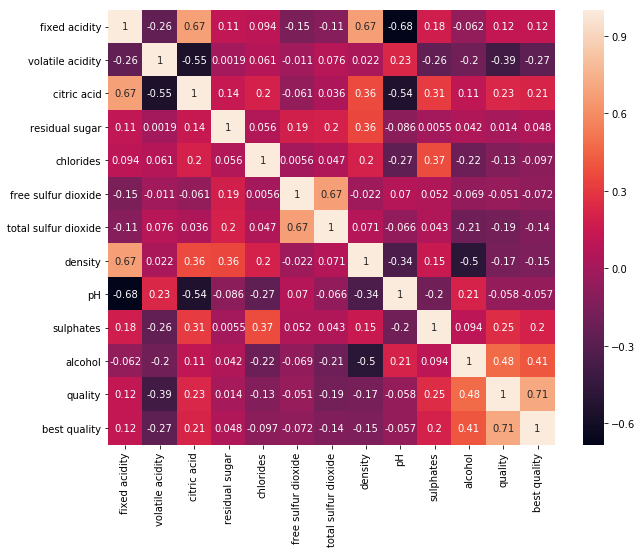

In [31]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation:
1. alcohol and quality of the wine quality have positive correlation 0.48
2. fixed acidity  and  dennisty have positve correlation 0.67
3. sulphates and chlorides have positive positivet corelation:0.37

In [33]:
#to display the
corr_matrix=df.corr()
corr_matrix['best quality'].sort_values(ascending = False)


best quality            1.000000
quality                 0.710196
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: best quality, dtype: float64

Observation: 5 variables have negative so relation with target variable and 6 variable have positive corelation with target variable 

In [34]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality'],
      dtype='object')

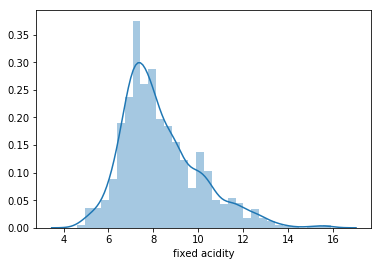

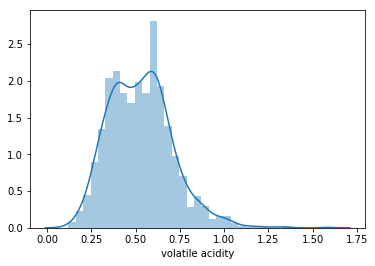

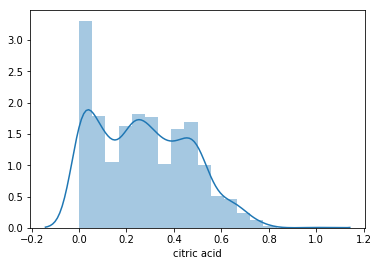

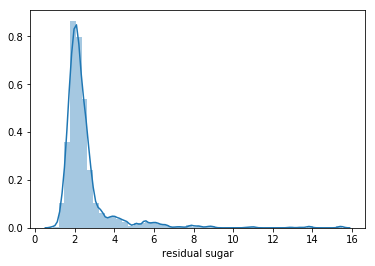

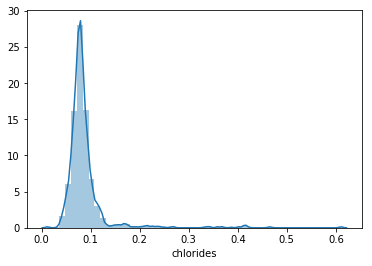

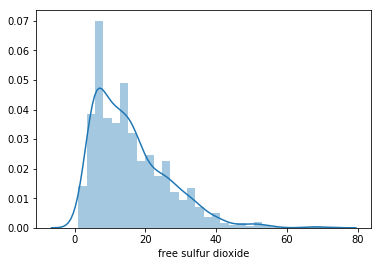

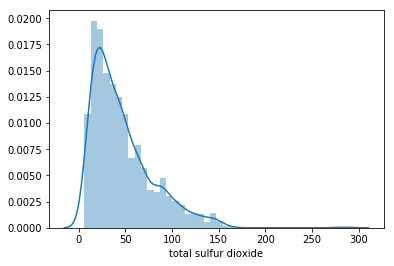

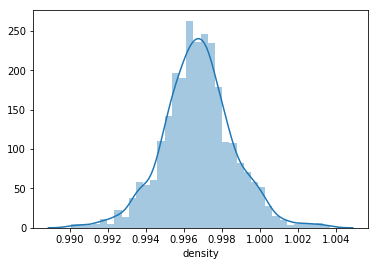

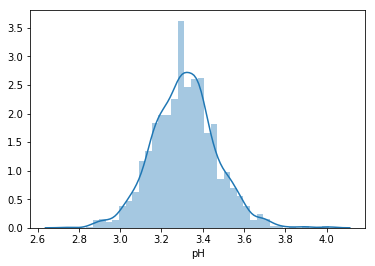

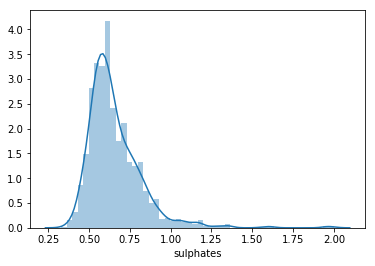

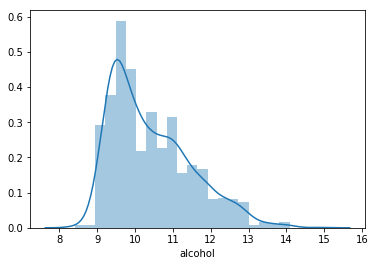

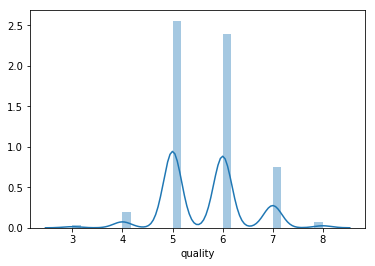

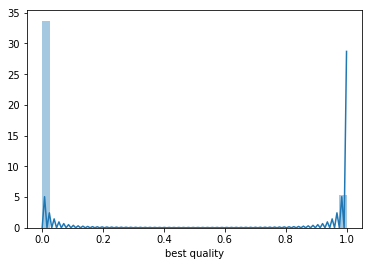

In [35]:
columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

Observation:data is distributed normly in PH value and density Remaining all columns data normaly not distributed

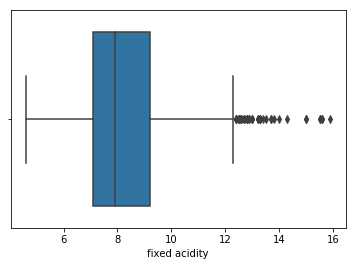

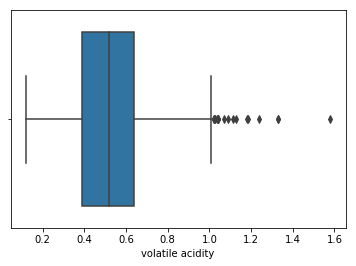

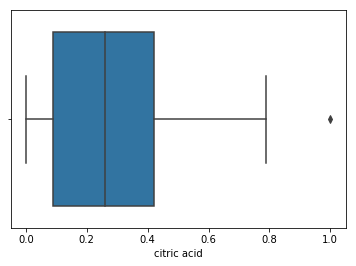

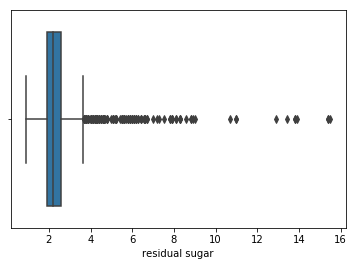

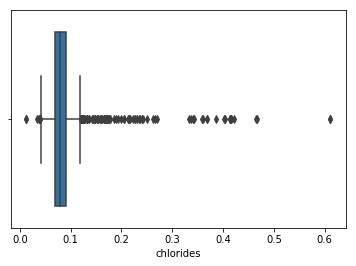

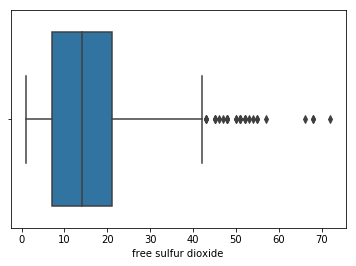

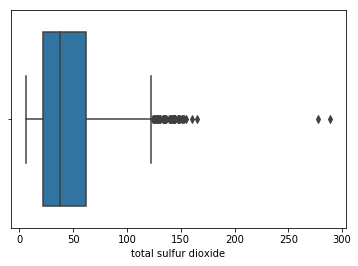

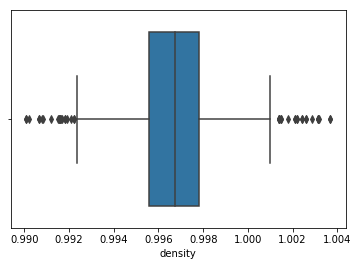

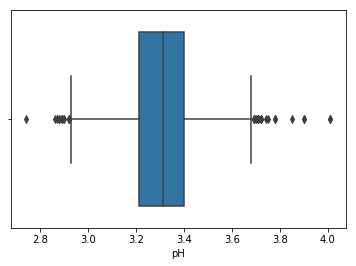

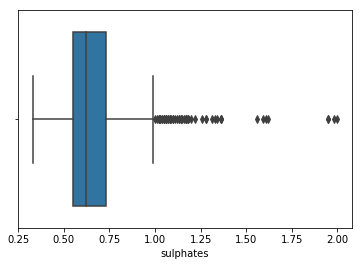

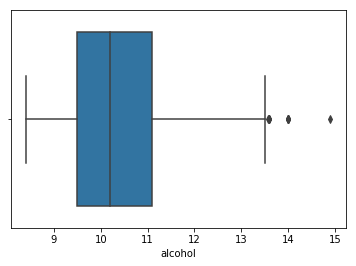

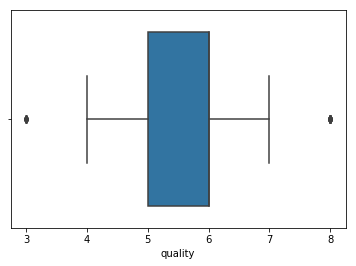

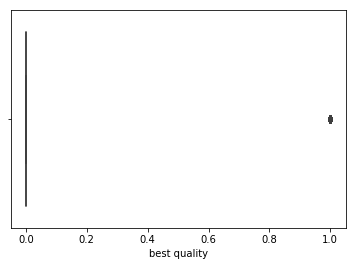

In [36]:
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation: All variables have outliers need to treat them first

In [63]:
#Spliting the data into x and y

x =df.drop(['quality','best quality'],axis=1)
y=df['best quality']

In [64]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#### We use minmax scalar to normalize the data 

In [66]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


In [67]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


0.88125


Observation we are getting the accuracy 89%

In [68]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
print("accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score 0.8625
[[265   7]
 [ 37  11]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       272
           1       0.61      0.23      0.33        48

   micro avg       0.86      0.86      0.86       320
   macro avg       0.74      0.60      0.63       320
weighted avg       0.84      0.86      0.83       320



Observation:Accuracy score of the logistic regression model :  0.8625

In [70]:
#import SMOTE module from imblearn library
!pip install imblearn 
#(if you don't have imblearn in your system)
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2)
#x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/80/98/dc784205a7e3034e84d41ac4781660c67ad6327f2f5a80c568df31673d1c/imbalanced_learn-0.8.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/ac/98a9c3f4b6e810c45196f6e15e04f9d83fe3d6000eebbb74dfd084446432/scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.20.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [71]:
!--

'--' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
#AUC ROC CURVE

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [73]:

y_pred_prob =lg.predict_proba(x_test)[:,1]

y_pred_prob


array([0.18972171, 0.01891661, 0.12193626, 0.42353806, 0.05499185,
       0.05746977, 0.10842363, 0.44135778, 0.0405558 , 0.05586857,
       0.12098835, 0.08582789, 0.27760762, 0.59010269, 0.02878829,
       0.24611482, 0.14370052, 0.01421949, 0.03559491, 0.01680117,
       0.02418087, 0.03981016, 0.00787863, 0.04627821, 0.6208796 ,
       0.03020828, 0.09254463, 0.02503343, 0.11203706, 0.03331299,
       0.02733382, 0.17388378, 0.02248444, 0.00822514, 0.01906176,
       0.06716723, 0.75338418, 0.01737682, 0.09283323, 0.11108947,
       0.02086345, 0.09923934, 0.01621778, 0.11186876, 0.1804197 ,
       0.02091051, 0.09037682, 0.29538656, 0.65768981, 0.01404474,
       0.44135778, 0.02251226, 0.02389683, 0.22334029, 0.30676939,
       0.01206104, 0.07868637, 0.09177141, 0.18477989, 0.03057195,
       0.17764611, 0.01606068, 0.07218354, 0.20759782, 0.06719779,
       0.03750527, 0.01432939, 0.08015487, 0.37023129, 0.53310083,
       0.01919875, 0.02092574, 0.02511311, 0.32150261, 0.21468

In [74]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [75]:
tpr

array([0.        , 0.        , 0.        , 0.0625    , 0.0625    ,
       0.08333333, 0.08333333, 0.125     , 0.125     , 0.1875    ,
       0.1875    , 0.22916667, 0.22916667, 0.25      , 0.25      ,
       0.27083333, 0.27083333, 0.29166667, 0.33333333, 0.41666667,
       0.41666667, 0.5       , 0.5       , 0.52083333, 0.52083333,
       0.54166667, 0.54166667, 0.5625    , 0.5625    , 0.58333333,
       0.58333333, 0.625     , 0.625     , 0.64583333, 0.64583333,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.6875    ,
       0.6875    , 0.77083333, 0.77083333, 0.83333333, 0.83333333,
       0.85416667, 0.85416667, 0.85416667, 0.85416667, 0.875     ,
       0.875     , 0.89583333, 0.89583333, 0.91666667, 0.91666667,
       0.9375    , 0.9375    , 0.9375    , 0.9375    , 0.95833333,
       0.95833333, 0.95833333, 0.97916667, 0.97916667, 1.        ,
       1.        , 1.        , 1.        ])

In [76]:
thresholds

array([1.82656386e+00, 8.26563865e-01, 7.53384178e-01, 6.79786807e-01,
       6.57689809e-01, 6.20879603e-01, 6.08875361e-01, 5.90102692e-01,
       5.70555752e-01, 5.53708240e-01, 5.33100829e-01, 5.10376050e-01,
       4.88490205e-01, 4.85048870e-01, 4.74423889e-01, 4.70627616e-01,
       4.67151845e-01, 4.65306506e-01, 4.41357779e-01, 4.07507791e-01,
       4.01707684e-01, 3.65691843e-01, 3.54485754e-01, 3.54198671e-01,
       3.21502612e-01, 3.06769386e-01, 2.97449748e-01, 2.95386556e-01,
       2.74029312e-01, 2.69386705e-01, 2.60772696e-01, 2.52855492e-01,
       2.48102455e-01, 2.46114818e-01, 2.32416997e-01, 2.27687083e-01,
       2.07597817e-01, 2.07375657e-01, 1.90872377e-01, 1.89721707e-01,
       1.84779893e-01, 1.78600305e-01, 1.55703813e-01, 1.39274815e-01,
       1.24697474e-01, 1.24113875e-01, 1.17468124e-01, 1.16206013e-01,
       1.11868760e-01, 1.11847330e-01, 1.11089474e-01, 1.10565602e-01,
       1.07489194e-01, 1.06722693e-01, 9.76206388e-02, 9.74942771e-02,
      

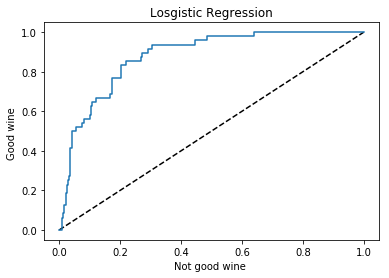

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Not good wine ')
plt.ylabel('Good wine ')
plt.title('Losgistic Regression')
plt.show()


In [78]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [79]:
print(auc_score)

0.6017156862745098


Observation: We getting the AUC_SCORE accuracy score is 60%

In [80]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())


[0.85981308 0.75077882 0.86206897 0.76489028 0.79937304]
0.8073848377425561


In [81]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.81 accuracy with a standard deviation of 0.05


Observation: cross validetion of decisiontree classification score is 0.81

#### Saving the Model 

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(knn, 'filename.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('filename.pkl') 
  
# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)
